In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.stats import multivariate_normal

iris = datasets.load_iris()
data = iris.data[:, :2]
labels = iris.target
target_ids = np.unique(labels)#labels = array([0, 1, 2])
Ndata = np.shape(data)[0]


#X = iris.data[:, :2]
#y = iris.target
import scipy.stats


# Loop over classes
classes = np.unique(labels)
m = np.zeros((len(classes), d.shape[1]))

std = np.zeros((len(classes),d.shape[1]))
prio = np.zeros(len(classes))
for i in range(len(classes)):
    indices = np.squeeze(np.where(labels==classes[i]))
    d = np.squeeze(data[indices,:])
    print('\n',i, len(d)/Ndata)
    prio[i]= len(d)/Ndata
    for j in range(0, d.shape[1]):
        #print(d[:,var])
        print(np.mean(d[:,j]), np.std(d[:,j]))
        m[i,j] = np.mean(d[:,j])
        std[i,j] = np.std(d[:,j])               
print(m, std, prio)      


 0 0.3333333333333333
5.006 0.3489469873777391
3.428 0.37525458025186054

 1 0.3333333333333333
5.936 0.5109833656783751
2.7700000000000005 0.31064449134018135

 2 0.3333333333333333
6.587999999999998 0.6294886813914926
2.974 0.3192553836664309
[[5.006 3.428]
 [5.936 2.77 ]
 [6.588 2.974]] [[0.34894699 0.37525458]
 [0.51098337 0.31064449]
 [0.62948868 0.31925538]] [0.33333333 0.33333333 0.33333333]


\begin{equation}
P(Setosa) \times P(x_i | Setosa) \times P(x_j | Setosa) \\
P(Versicolor) \times P(x_i | Versicolor) \times P(x_j | Versicolor) \\
P(Virginica) \times P(x_i | Virginica) \times P(x_j | Virginica)
\end{equation}

In [12]:
h = 0.1
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [13]:
inputs =  np.c_[xx.ravel(), yy.ravel()]
nInputs = np.shape(inputs)[0]

In [14]:
import scipy.stats
scipy.stats.norm(0, 1).pdf(0)

0.3989422804014327

In [15]:
inputs.shape[0]

2464

In [16]:
inputs[0], inputs[0,0]

(array([3.3, 1. ]), 3.3)

In [17]:
c = np.zeros(nInputs)

In [18]:
for n in range(nInputs):
    psi = scipy.stats.norm(m[0,0], std[0,0]).pdf(inputs[n][0])
    psj = scipy.stats.norm(m[0,1], std[0,1]).pdf(inputs[n][1])
    print(psi, psj)
    print('---',psi*psj)
    pvi = scipy.stats.norm(m[1,0], std[1,0]).pdf(inputs[n][0])
    pvj = scipy.stats.norm(m[1,1], std[1,1]).pdf(inputs[n][1])
    print(pvi, pvj )
    print('---',pvi*pvj)
    print(inputs[0][0],inputs[0][1])
    pti = scipy.stats.norm(m[2,0], std[2,0]).pdf(inputs[n][0])
    ptj = scipy.stats.norm(m[2,1], std[2,1]).pdf(inputs[n][1])
    print(np.argmax([psi*psj,pvi*pvj ,pti*ptj]))
    c[n] =np.argmax([psi*psj,pvi*pvj ,pti*ptj]) 

7.37630111680725e-06 8.626504551498303e-10
--- 6.363169515735975e-15
1.2995229716973262e-06 1.1452474944716217e-07
--- 1.488275427344679e-13
3.3 1.0
1
2.873972158938036e-05 8.626504551498303e-10
--- 2.4792333909958372e-14
3.49875504527528e-06 1.1452474944716217e-07
--- 4.00694044937146e-13
3.3 1.0
1
0.00010314770576479401 8.626504551498303e-10
--- 8.898041532566033e-14
9.065882936624721e-06 1.1452474944716217e-07
--- 1.038267971834249e-12
3.3 1.0
1
0.00034101201856475224 8.626504551498303e-10
--- 2.941741730264459e-13
2.260859991084898e-05 1.1452474944716217e-07
--- 2.5892442401411126e-12
3.3 1.0
1
0.0010385152895679658 8.626504551498303e-10
--- 8.958756872258635e-13
5.4263052707900055e-05 1.1452474944716217e-07
--- 6.214462515610408e-12
3.3 1.0
1
0.0029133267790415747 8.626504551498303e-10
--- 2.5131826719404034e-12
0.00012534348596516149 1.1452474944716217e-07
--- 1.4354931324994008e-11
3.3 1.0
1
0.007528329231261315 8.626504551498303e-10
--- 6.494316637865346e-12
0.00027865465828205

2.97698135639633e-09 4.669177112762392e-09
--- 1.3900053214406085e-17
0.036625099814645484 6.807358678780888e-07
--- 2.4932019108444322e-08
3.3 1.0
1
4.714230396206075e-10 4.669177112762392e-09
--- 2.201157667025419e-18
0.022142216708955362 6.807358678780888e-07
--- 1.5073001108115447e-08
3.3 1.0
1
6.87667642169858e-11 4.669177112762392e-09
--- 3.2108420160067797e-19
0.012883396395606813 6.807358678780888e-07
--- 8.770190026580845e-09
3.3 1.0
2
9.240159577582331e-12 4.669177112762392e-09
--- 4.3143941617919634e-20
0.0072145065846584856 6.807358678780888e-07
--- 4.91117340121968e-09
3.3 1.0
2
1.1437035007226651e-12 4.669177112762392e-09
--- 5.3401542093604944e-21
0.0038882115973524183 6.807358678780888e-07
--- 2.6468450962173485e-09
3.3 1.0
2
1.3040088112577055e-13 4.669177112762392e-09
--- 6.088648096364973e-22
0.002016787499691379 6.807358678780888e-07
--- 1.3728995889280915e-09
3.3 1.0
2
1.3695588484163516e-14 4.669177112762392e-09
--- 6.394712829606848e-23
0.0010067864985054797 6.80

0.06595713971402814 1.7624766547582533e-05
--- 1.1624791896060306e-06
3.3 1.0
1
1.0917242226020551 1.1054204915459311e-07
--- 1.2068143267813632e-07
0.09997611963032099 1.7624766547582533e-05
--- 1.7620557688175908e-06
3.3 1.0
1
1.1431057575238852 1.1054204915459311e-07
--- 1.2636125283710373e-07
0.14584707764072322 1.7624766547582533e-05
--- 2.5705206950648908e-06
3.3 1.0
1
1.1025364969698788 1.1054204915459311e-07
--- 1.2187664364277723e-07
0.20476992864327473 1.7624766547582533e-05
--- 3.609022188302851e-06
3.3 1.0
1
0.9795635893200458 1.1054204915459311e-07
--- 1.0828296644066616e-07
0.27669519587676067 1.7624766547582533e-05
--- 4.876688232165528e-06
3.3 1.0
1
0.8016880125219589 1.1054204915459311e-07
--- 8.862023568685044e-08
0.35983553646173544 1.7624766547582533e-05
--- 6.342017325662209e-06
3.3 1.0
1
0.6043816113552478 1.1054204915459311e-07
--- 6.680958179056399e-08
0.4503741708294304 1.7624766547582533e-05
--- 7.937739619929765e-06
3.3 1.0
1
0.41971084516947427 1.10542049154

0.00022366232950883768 7.676952056648644e-05
--- 1.717044980517698e-08
3.3 1.0
2
9.693481696960827e-18 4.835141427329405e-07
--- 4.686935492803464e-24
9.953390958218133e-05 7.676952056648644e-05
--- 7.641170518732071e-09
3.3 1.0
2
7.330141417854778e-19 4.835141427329405e-07
--- 3.544227043765274e-25
4.2630092454043644e-05 7.676952056648644e-05
--- 3.2726917594019217e-09
3.3 1.0
2
5.1059670616765845e-20 4.835141427329405e-07
--- 2.4688072866491852e-26
1.757229471382964e-05 7.676952056648644e-05
--- 1.3490166404337054e-09
3.3 1.0
2
3.2762479406731224e-21 4.835141427329405e-07
--- 1.5841122144151266e-27
6.971202120866074e-06 7.676952056648644e-05
--- 5.351758445909619e-10
3.3 1.0
2
1.9364603532071928e-22 4.835141427329405e-07
--- 9.36305967617303e-29
2.66166787797638e-06 7.676952056648644e-05
--- 2.0433496689946401e-10
3.3 1.0
2
1.0543226951258605e-23 4.835141427329405e-07
--- 5.0977993409766384e-30
9.780634832045163e-07 7.676952056648644e-05
--- 7.508546468919847e-11
3.3 1.0
2
5.28775831

0.15820761356786647 7.475645548438768e-06
--- 1.1827040420977419e-06
0.7017520721281735 0.001067347679670563
--- 0.0007490134458900155
3.3 1.0
1
0.08587477629290892 7.475645548438768e-06
--- 6.419693891172596e-07
0.7535656572512606 0.001067347679670563
--- 0.0008043165557465558
3.3 1.0
1
0.04293751978044406 7.475645548438768e-06
--- 3.209856786076782e-07
0.7787991778679377 0.001067347679670563
--- 0.0008312494954266855
3.3 1.0
1
0.019776133579105137 7.475645548438768e-06
--- 1.4783936495596776e-07
0.7746345499637122 0.001067347679670563
--- 0.000826804389496419
3.3 1.0
1
0.008390327557188963 7.475645548438768e-06
--- 6.272311485284279e-08
0.7415411133108945 0.001067347679670563
--- 0.0007914821866727092
3.3 1.0
1
0.0032790613458004974 7.475645548438768e-06
--- 2.4513100352791123e-08
0.6831885802722147 0.001067347679670563
--- 0.0007291997459309746
3.3 1.0
1
0.0011804654049616043 7.475645548438768e-06
--- 8.824740949687184e-09
0.6057772431910063 0.001067347679670563
--- 0.00064657493491

2.4428833862580728e-26 2.6424486139383543e-05
--- 6.455193818030678e-31
1.1773196259615539e-07 0.003406885492946036
--- 4.010993154249071e-10
3.3 1.0
2
7.37630111680725e-06 8.700077591352858e-05
--- 6.417439205340581e-10
1.2995229716973262e-06 0.009804028252731854
--- 1.2740559929594643e-08
3.3 1.0
1
2.873972158938036e-05 8.700077591352858e-05
--- 2.50037807781488e-09
3.49875504527528e-06 0.009804028252731854
--- 3.4301893313266964e-08
3.3 1.0
1
0.00010314770576479401 8.700077591352858e-05
--- 8.973930435237423e-09
9.065882936624721e-06 0.009804028252731854
--- 8.888217244662839e-08
3.3 1.0
1
0.00034101201856475224 8.700077591352858e-05
--- 2.9668310210972055e-08
2.260859991084898e-05 0.009804028252731854
--- 2.2165535228067428e-07
3.3 1.0
1
0.0010385152895679658 8.700077591352858e-05
--- 9.035163599047583e-08
5.4263052707900055e-05 0.009804028252731854
--- 5.319965018277299e-07
3.3 1.0
1
0.0029133267790415747 8.700077591352858e-05
--- 2.53461690266278e-07
0.00012534348596516149 0.0098

0.0011804654049616043 0.0002668077419255014
--- 3.149573091189782e-07
0.6057772431910063 0.025435891379859014
--- 0.015408484158196876
3.3 1.0
1
0.0003914624258754715 0.0002668077419255014
--- 1.0444520589651352e-07
0.5169544795544052 0.025435891379859014
--- 0.013149197990277398
3.3 1.0
1
0.00011958039915919698 0.0002668077419255014
--- 3.190497627821547e-08
0.424579131020896 0.025435891379859014
--- 0.01079954865880244
3.3 1.0
1
3.3648290987336407e-05 0.0002668077419255014
--- 8.977624537983426e-09
0.33560774685450007 0.025435891379859014
--- 0.008536482195230285
3.3 1.0
1
8.721659351295943e-06 0.0002668077419255014
--- 2.3270062373627038e-09
0.25531263202005583 0.025435891379859014
--- 0.006494104375968055
3.3 1.0
1
2.0824199978673314e-06 0.0002668077419255014
--- 5.556057773714901e-10
0.18693026465040494 0.025435891379859014
--- 0.004754737907255999
3.3 1.0
1
4.580054311674995e-07 0.0002668077419255014
--- 1.221993948794162e-10
0.13172067005646235 0.025435891379859014
--- 0.0033504

0.0793643368069003 0.0020278004195115394
--- 0.00016093503547128755
0.0024331107534514523 0.1254636588027028
--- 0.00030526697740022017
3.3 1.0
1
0.14766146768847777 0.0020278004195115394
--- 0.00029942798612438485
0.00464081639210566 0.1254636588027028
--- 0.0005822538043851348
3.3 1.0
1
0.25307081677298515 0.0020278004195115394
--- 0.0005131771084183872
0.00851910335414169 0.1254636588027028
--- 0.001068837876528994
3.3 1.0
1
0.39953060171904187 0.0020278004195115394
--- 0.0008101683217735709
0.015050827568859218 0.1254636588027028
--- 0.0018883318947976657
3.3 1.0
1
0.5810200623209424 0.0020278004195115394
--- 0.0011781927261190278
0.02559138943574097 0.1254636588027028
--- 0.003210789352452898
3.3 1.0
1
0.7783327496956609 0.0020278004195115394
--- 0.0015783034763524311
0.04187881106282688 0.1254636588027028
--- 0.005254268862249367
3.3 1.0
1
0.9604451705222035 0.0020278004195115394
--- 0.0019475911197027562
0.06595713971402814 0.1254636588027028
--- 0.008275224072683026
3.3 1.0
1
1

0.058304695201196056 0.23853193291073482
--- 0.01390753164411254
3.3 1.0
2
2.97698135639633e-09 0.005025470042224623
--- 1.4960730622830978e-11
0.036625099814645484 0.23853193291073482
--- 0.008736255851835984
3.3 1.0
2
4.714230396206075e-10 0.005025470042224623
--- 2.3691223628278346e-12
0.022142216708955362 0.23853193291073482
--- 0.0052816257505154925
3.3 1.0
2
6.87667642169858e-11 0.005025470042224623
--- 3.4558531347318634e-13
0.012883396395606813 0.23853193291073482
--- 0.0030731014446992873
3.3 1.0
2
9.240159577582331e-12 0.005025470042224623
--- 4.643614514251493e-14
0.0072145065846584856 0.23853193291073482
--- 0.0017208902006358125
3.3 1.0
2
1.1437035007226651e-12 0.005025470042224623
--- 5.7476476800691806e-15
0.0038882115973524183 0.23853193291073482
--- 0.0009274626278824082
3.3 1.0
2
1.3040088112577055e-13 0.005025470042224623
--- 6.553257215772541e-16
0.002016787499691379 0.23853193291073482
--- 0.00048106822057159264
3.3 1.0
2
1.3695588484163516e-14 0.005025470042224623

1
0.7783327496956609 0.024943410069175376
--- 0.019414272945927707
0.04187881106282688 0.631814890347907
--- 0.02645965641956068
3.3 1.0
1
0.9604451705222035 0.024943410069175376
--- 0.02395677773729439
0.06595713971402814 0.631814890347907
--- 0.04167270299608027
3.3 1.0
1
1.0917242226020551 0.024943410069175376
--- 0.02723132496681476
0.09997611963032099 0.631814890347907
--- 0.0631664010616405
3.3 1.0
1
1.1431057575238852 0.024943410069175376
--- 0.028512955662353626
0.14584707764072322 0.631814890347907
--- 0.09214835536713623
3.3 1.0
1
1.1025364969698788 0.024943410069175376
--- 0.02750101996015182
0.20476992864327473 0.631814890347907
--- 0.12937669001229937
3.3 1.0
1
0.9795635893200458 0.024943410069175376
--- 0.024433656297243204
0.27669519587676067 0.631814890347907
--- 0.1748201448426682
3.3 1.0
1
0.8016880125219589 0.024943410069175376
--- 0.019996832843877425
0.35983553646173544 0.631814890347907
--- 0.2273494500128517
3.3 1.0
1
0.6043816113552478 0.024943410069175376
--- 0

9.693481696960827e-18 0.04995552009723447
--- 4.842429197247011e-19
9.953390958218133e-05 0.8802471090938743
--- 8.761443616652619e-05
3.3 1.0
2
7.330141417854778e-19 0.04995552009723447
--- 3.661810269152151e-20
4.2630092454043644e-05 0.8802471090938743
--- 3.75250156430765e-05
3.3 1.0
2
5.1059670616765845e-20 0.04995552009723447
--- 2.5507124016540182e-21
1.757229471382964e-05 0.8802471090938743
--- 1.5467961621994106e-05
3.3 1.0
2
3.2762479406731224e-21 0.04995552009723447
--- 1.6366666984381921e-22
6.971202120866074e-06 0.8802471090938743
--- 6.136380513801447e-06
3.3 1.0
2
1.9364603532071928e-22 0.04995552009723447
--- 9.673688409213968e-24
2.66166787797638e-06 0.8802471090938743
--- 2.3429254549567354e-06
3.3 1.0
2
1.0543226951258605e-23 0.04995552009723447
--- 5.266923858533033e-25
9.780634832045163e-07 0.8802471090938743
--- 8.609375536010606e-07
3.3 1.0
2
5.287758319548049e-25 0.04995552009723447
--- 2.641527170015013e-26
3.458973365689455e-07 0.8802471090938743
--- 3.04475130

0.019776133579105137 0.16192540049599702
--- 0.003202258350058934
0.7746345499637122 1.2520459848009562
--- 0.9698780779701615
3.3 1.0
1
0.008390327557188963 0.16192540049599702
--- 0.001358607149990423
0.7415411133108945 1.2520459848009562
--- 0.9284435734857363
3.3 1.0
1
0.0032790613458004974 0.16192540049599702
--- 0.0005309633216696885
0.6831885802722147 1.2520459848009562
--- 0.8553835187916922
3.3 1.0
1
0.0011804654049616043 0.16192540049599702
--- 0.0001911473334700771
0.6057772431910063 1.2520459848009562
--- 0.7584609650210918
3.3 1.0
1
0.0003914624258754715 0.16192540049599702
--- 6.338771008902028e-05
0.5169544795544052 1.2520459848009562
--- 0.6472507804509611
3.3 1.0
1
0.00011958039915919698 0.16192540049599702
--- 1.9363104025324156e-05
0.424579131020896 1.2520459848009562
--- 0.531592596224992
3.3 1.0
2
3.3648290987336407e-05 0.16192540049599702
--- 5.448512994130295e-06
0.33560774685450007 1.2520459848009562
--- 0.42019633191727257
3.3 1.0
2
8.721659351295943e-06 0.1619

2
7.37630111680725e-06 0.39507666539279046
--- 2.9142044481613242e-06
1.2995229716973262e-06 1.176569305055246
--- 1.5289788397132512e-06
3.3 1.0
0
2.873972158938036e-05 0.39507666539279046
--- 1.1354393369849581e-05
3.49875504527528e-06 1.176569305055246
--- 4.116527792178071e-06
3.3 1.0
0
0.00010314770576479401 0.39507666539279046
--- 4.075125163647153e-05
9.065882936624721e-06 1.176569305055246
--- 1.066663958645676e-05
3.3 1.0
0
0.00034101201856475224 0.39507666539279046
--- 0.00013472589115342667
2.260859991084898e-05 1.176569305055246
--- 2.660058468537968e-05
3.3 1.0
0
0.0010385152895679658 0.39507666539279046
--- 0.0004102931575619401
5.4263052707900055e-05 1.176569305055246
--- 6.384424221471014e-05
3.3 1.0
0
0.0029133267790415747 0.39507666539279046
--- 0.001150987429063264
0.00012534348596516149 1.176569305055246
--- 0.00014747529817523203
3.3 1.0
0
0.007528329231261315 0.39507666539279046
--- 0.00297426720866579
0.0002786546582820575 1.176569305055246
--- 0.0003278565176453

0.0032790613458004974 0.5547568436325789
--- 0.0018190817222738804
0.6831885802722147 0.9763582874510175
--- 0.6670368322406716
3.3 1.0
1
0.0011804654049616043 0.5547568436325789
--- 0.0006548712620739537
0.6057772431910063 0.9763582874510175
--- 0.5914556317387695
3.3 1.0
2
0.0003914624258754715 0.5547568436325789
--- 0.00021716645977942897
0.5169544795544052 0.9763582874510175
--- 0.5047327903478711
3.3 1.0
2
0.00011958039915919698 0.5547568436325789
--- 6.633804479788e-05
0.424579131020896 0.9763582874510175
--- 0.4145413532510032
3.3 1.0
2
3.3648290987336407e-05 0.5547568436325789
--- 1.8666619701765296e-05
0.33560774685450007 0.9763582874510175
--- 0.3276734049741543
3.3 1.0
2
8.721659351295943e-06 0.5547568436325789
--- 4.838400212963504e-06
0.25531263202005583 0.9763582874510175
--- 0.24927660416371353
3.3 1.0
2
2.0824199978673314e-06 0.5547568436325789
--- 1.1552367451342426e-06
0.18693026465040494 0.9763582874510175
--- 0.18251091306683484
3.3 1.0
2
4.580054311674995e-07 0.554

0.00012534348596516149 0.4926957250888828
--- 6.175619970277345e-05
3.3 1.0
0
0.007528329231261315 0.8839372278288521
--- 0.00665457047086404
0.0002786546582820575 0.4926957250888828
--- 0.00013729195891167318
3.3 1.0
0
0.017920127812400887 0.8839372278288521
--- 0.01584026810083235
0.0005962080542971096 0.4926957250888828
--- 0.00029374915961574645
3.3 1.0
0
0.039293136674873955 0.8839372278288521
--- 0.03473266630508828
0.0012277116083525442 0.4926957250888828
--- 0.0006048882610772952
3.3 1.0
0
0.0793643368069003 0.8839372278288521
--- 0.07015309186556679
0.0024331107534514523 0.4926957250888828
--- 0.0011987832668933214
3.3 1.0
0
0.14766146768847777 0.8839372278288521
--- 0.13052346840569265
0.00464081639210566 0.4926957250888828
--- 0.0022865103973128712
3.3 1.0
0
0.25307081677298515 0.8839372278288521
--- 0.22369871622269585
0.00851910335414169 0.4926957250888828
--- 0.004197325804175973
3.3 1.0
0
0.39953060171904187 0.8839372278288521
--- 0.3531599725163231
0.015050827568859218 

2
1.7317074390442976e-08 1.0030414780450734
--- 1.736974389200641e-08
0.058304695201196056 0.2996102509729545
--- 0.01746868436213197
3.3 1.0
2
2.97698135639633e-09 1.0030414780450734
--- 2.986035779832402e-09
0.036625099814645484 0.2996102509729545
--- 0.010973255347375444
3.3 1.0
2
4.714230396206075e-10 1.0030414780450734
--- 4.728568624455554e-10
0.022142216708955362 0.2996102509729545
--- 0.0066340351052676634
3.3 1.0
2
6.87667642169858e-11 1.0030414780450734
--- 6.89759168205825e-11
0.012883396395606813 0.2996102509729545
--- 0.003859997627471815
3.3 1.0
2
9.240159577582331e-12 1.0030414780450734
--- 9.268263320070523e-12
0.0072145065846584856 0.2996102509729545
--- 0.0021615401284755618
3.3 1.0
2
1.1437035007226651e-12 1.0030414780450734
--- 1.1471820498101866e-12
0.0038882115973524183 0.2996102509729545
--- 0.0011649480525187104
3.3 1.0
2
1.3040088112577055e-13 1.0030414780450734
--- 1.307974925427728e-13
0.002016787499691379 0.2996102509729545
--- 0.0006042502089416515
3.3 1.0


0.02559138943574097 0.08118926099969419
--- 0.00207774599624319
3.3 1.0
0
0.7783327496956609 1.0437344201467684
--- 0.8123726811848405
0.04187881106282688 0.08118926099969419
--- 0.0034001097217367317
3.3 1.0
0
0.9604451705222035 1.0437344201467684
--- 1.002449683137756
0.06595713971402814 0.08118926099969419
--- 0.005355011431035526
3.3 1.0
0
1.0917242226020551 1.0437344201467684
--- 1.1394701484377376
0.09997611963032099 0.08118926099969419
--- 0.008116987270402781
3.3 1.0
0
1.1431057575238852 1.0437344201467684
--- 1.1930988249956247
0.14584707764072322 0.08118926099969419
--- 0.01184121645261534
3.3 1.0
0
1.1025364969698788 1.0437344201467684
--- 1.1507552913555057
0.20476992864327473 0.08118926099969419
--- 0.016625119181507587
3.3 1.0
0
0.9795635893200458 1.0437344201467684
--- 1.0224042348958453
0.27669519587676067 0.08118926099969419
--- 0.02246467847539983
3.3 1.0
0
0.8016880125219589 1.0437344201467684
--- 0.8367493728882219
0.35983553646173544 0.08118926099969419
--- 0.02921

1.3695588484163516e-14 0.9571139622646273
--- 1.3108238959623543e-14
0.0010067864985054797 0.036179506121603026
--- 3.6425038285826276e-05
3.3 1.0
2
1.3249941687947102e-15 0.9571139622646273
--- 1.2681704188726314e-15
0.0004837061588780144 0.036179506121603026
--- 1.7500249936184208e-05
3.3 1.0
2
1.1808108429662974e-16 0.9571139622646273
--- 1.1301705445965076e-16
0.00022366232950883768 0.036179506121603026
--- 8.091992619636986e-06
3.3 1.0
2
9.693481696960827e-18 0.9571139622646273
--- 9.27776667511782e-18
9.953390958218133e-05 0.036179506121603026
--- 3.6010876910356114e-06
3.3 1.0
2
7.330141417854778e-19 0.9571139622646273
--- 7.015780696403039e-19
4.2630092454043644e-05 0.036179506121603026
--- 1.5423356909055751e-06
3.3 1.0
2
5.1059670616765845e-20 0.9571139622646273
--- 4.8869923655939525e-20
1.757229471382964e-05 0.036179506121603026
--- 6.357569441696119e-07
3.3 1.0
2
3.2762479406731224e-21 0.9571139622646273
--- 3.135742647858978e-21
6.971202120866074e-06 0.036179506121603026


0.5425126790816818 0.005264739619547128
--- 0.0028561879956679865
3.3 1.0
0
0.26848636628532685 0.6504098683092618
--- 0.17462618213847167
0.6289459167328467 0.005264739619547128
--- 0.003311236486375807
3.3 1.0
0
0.15820761356786647 0.6504098683092618
--- 0.10289979310619862
0.7017520721281735 0.005264739619547128
--- 0.0036945419372324886
3.3 1.0
0
0.08587477629290892 0.6504098683092618
--- 0.05585380193975821
0.7535656572512606 0.005264739619547128
--- 0.003967326971660783
3.3 1.0
0
0.04293751978044406 0.6504098683092618
--- 0.027926986585924945
0.7787991778679377 0.005264739619547128
--- 0.0041001748873920624
3.3 1.0
0
0.019776133579105137 0.6504098683092618
--- 0.012862592436852144
0.7746345499637122 0.005264739619547128
--- 0.004078249205864015
3.3 1.0
2
0.008390327557188963 0.6504098683092618
--- 0.005457151841542844
0.7415411133108945 0.005264739619547128
--- 0.003904020878770952
3.3 1.0
2
0.0032790613458004974 0.6504098683092618
--- 0.0021327338581000922
0.6831885802722147 0.0

1.2995229716973262e-06 0.0005061424019389633
--- 6.577436782697442e-10
3.3 1.0
0
2.873972158938036e-05 0.3326944045908299
--- 9.561544562285118e-06
3.49875504527528e-06 0.0005061424019389633
--- 1.7708682824116967e-09
3.3 1.0
0
0.00010314770576479401 0.3326944045908299
--- 3.4316664554328255e-05
9.065882936624721e-06 0.0005061424019389633
--- 4.588627765240699e-09
3.3 1.0
0
0.00034101201856475224 0.3326944045908299
--- 0.00011345279047471727
2.260859991084898e-05 0.0005061424019389633
--- 1.1443171063354136e-08
3.3 1.0
0
0.0010385152895679658 0.3326944045908299
--- 0.00034550822592128766
5.4263052707900055e-05 0.0005061424019389633
--- 2.74648318341171e-08
3.3 1.0
0
0.0029133267790415747 0.3326944045908299
--- 0.0009692475181317569
0.00012534348596516149 0.0005061424019389633
--- 6.344165305380957e-08
3.3 1.0
0
0.007528329231261315 0.3326944045908299
--- 0.0025046330111582232
0.0002786546582820575 0.0005061424019389633
--- 1.410389380543616e-07
3.3 1.0
0
0.017920127812400887 0.33269440

8.721659351295943e-06 0.21390097954173456
--- 1.8655714784715317e-06
0.25531263202005583 0.00013434259092586192
--- 3.429936048167547e-05
3.3 1.0
2
2.0824199978673314e-06 0.21390097954173456
--- 4.45431677361119e-07
0.18693026465040494 0.00013434259092586192
--- 2.511269607559246e-05
3.3 1.0
2
4.580054311674995e-07 0.21390097954173456
--- 9.796781036216263e-08
0.13172067005646235 0.00013434259092586192
--- 1.769569609387575e-05
3.3 1.0
2
9.279103672438452e-08 0.21390097954173456
--- 1.9848093648038915e-08
0.0893295680777847 0.00013434259092586192
--- 1.2000765621857762e-05
3.3 1.0
2
1.7317074390442976e-08 0.21390097954173456
--- 3.7041391749128385e-09
0.058304695201196056 0.00013434259092586192
--- 7.832803816471347e-06
3.3 1.0
2
2.97698135639633e-09 0.21390097954173456
--- 6.367792282106566e-10
0.036625099814645484 0.00013434259092586192
--- 4.920310802017779e-06
3.3 1.0
2
4.714230396206075e-10 0.21390097954173456
--- 1.008378499533899e-10
0.022142216708955362 0.00013434259092586192
-

0.015050827568859218 6.9355656574097475e-06
--- 1.0438600280217583e-07
3.3 1.0
0
0.5810200623209424 0.07145349974195012
--- 0.0415159168731173
0.02559138943574097 6.9355656574097475e-06
--- 1.774907616959237e-07
3.3 1.0
0
0.7783327496956609 0.07145349974195012
--- 0.05561459892953023
0.04187881106282688 6.9355656574097475e-06
--- 2.904532437804935e-07
3.3 1.0
0
0.9604451705222035 0.07145349974195012
--- 0.0686271687440655
0.06595713971402814 6.9355656574097475e-06
--- 4.5745007306159016e-07
3.3 1.0
0
1.0917242226020551 0.07145349974195012
--- 0.07800751645797664
0.09997611963032099 6.9355656574097475e-06
--- 6.933909418691428e-07
3.3 1.0
0
1.1431057575238852 0.07145349974195012
--- 0.08167890695025462
0.14584707764072322 6.9355656574097475e-06
--- 1.011531982918573e-06
3.3 1.0
0
1.1025364969698788 0.07145349974195012
--- 0.07878009130172782
0.20476992864327473 6.9355656574097475e-06
--- 1.4201952847685408e-06
3.3 1.0
0
0.9795635893200458 0.07145349974195012
--- 0.06999324667670362
0.27

1.1808108429662974e-16 0.037125042555856504
--- 4.3837652795540584e-18
0.00022366232950883768 1.3489910147850487e-06
--- 3.017184728533149e-10
3.3 1.0
2
9.693481696960827e-18 0.037125042555856504
--- 3.5987092051408684e-19
9.953390958218133e-05 1.3489910147850487e-06
--- 1.3427034969279008e-10
3.3 1.0
2
7.330141417854778e-19 0.037125042555856504
--- 2.7213181207830494e-20
4.2630092454043644e-05 1.3489910147850487e-06
--- 5.7507611679960785e-11
3.3 1.0
2
5.1059670616765845e-20 0.037125042555856504
--- 1.8955924445354477e-21
1.757229471382964e-05 1.3489910147850487e-06
--- 2.370486767811099e-11
3.3 1.0
2
3.2762479406731224e-21 0.037125042555856504
--- 1.216308442210269e-22
6.971202120866074e-06 1.3489910147850487e-06
--- 9.404089023298808e-12
3.3 1.0
2
1.9364603532071928e-22 0.037125042555856504
--- 7.189117302054595e-24
2.66166787797638e-06 1.3489910147850487e-06
--- 3.590566051732124e-12
3.3 1.0
2
1.0543226951258605e-23 0.037125042555856504
--- 3.9141774924152892e-25
9.780634832045163e

0.5425126790816818 3.739810248946876e-08
--- 2.028894477413301e-08
3.3 1.0
0
0.26848636628532685 0.008098974819784657
--- 0.0021744643200003423
0.6289459167328467 3.739810248946876e-08
--- 2.3521383854307887e-08
3.3 1.0
0
0.15820761356786647 0.008098974819784657
--- 0.001281319478584372
0.7017520721281735 3.739810248946876e-08
--- 2.6244195915646506e-08
3.3 1.0
0
0.08587477629290892 0.008098974819784657
--- 0.0006954976508509097
0.7535656572512606 3.739810248946876e-08
--- 2.8181925682426533e-08
3.3 1.0
0
0.04293751978044406 0.008098974819784657
--- 0.00034774989152582203
0.7787991778679377 3.739810248946876e-08
--- 2.912561147261915e-08
3.3 1.0
0
0.019776133579105137 0.008098974819784657
--- 0.00016016640788987031
0.7746345499637122 3.739810248946876e-08
--- 2.896986229142642e-08
3.3 1.0
0
0.008390327557188963 0.008098974819784657
--- 6.795305161541872e-05
0.7415411133108945 3.739810248946876e-08
--- 2.77322305557556e-08
3.3 1.0
0
0.0032790613458004974 0.008098974819784657
--- 2.65570

3.458973365689455e-07 5.33043814871178e-09
--- 1.8437843583849053e-15
3.3 1.0
2
2.4428833862580728e-26 0.0034005540508295668
--- 8.307156994844138e-29
1.1773196259615539e-07 5.33043814871178e-09
--- 6.275629447452551e-16
3.3 1.0
2
7.37630111680725e-06 0.0013299277311952854
--- 9.809947408888715e-09
1.2995229716973262e-06 6.849701403209758e-10
--- 8.90134432273849e-16
3.3 1.0
0
2.873972158938036e-05 0.0013299277311952854
--- 3.8221752728548784e-08
3.49875504527528e-06 6.849701403209758e-10
--- 2.3965427343109308e-15
3.3 1.0
0
0.00010314770576479401 0.0013299277311952854
--- 1.3717899430577137e-07
9.065882936624721e-06 6.849701403209758e-10
--- 6.209859107233376e-15
3.3 1.0
0
0.00034101201856475224 0.0013299277311952854
--- 4.535213401601455e-07
2.260859991084898e-05 6.849701403209758e-10
--- 1.5486215853395027e-14
3.3 1.0
0
0.0010385152895679658 0.0013299277311952854
--- 1.3811502828667397e-06
5.4263052707900055e-05 6.849701403209758e-10
--- 3.716857082757481e-14
3.3 1.0
0
0.00291332677

0
0.008390327557188963 0.0004844680348946198
--- 4.064845503753513e-06
0.7415411133108945 7.935526782933126e-11
--- 5.884519365324651e-11
3.3 1.0
0
0.0032790613458004974 0.0004844680348946198
--- 1.5886004064988744e-06
0.6831885802722147 7.935526782933126e-11
--- 5.421461276544218e-11
3.3 1.0
0
0.0011804654049616043 0.0004844680348946198
--- 5.7189775500283e-07
0.6057772431910063 7.935526782933126e-11
--- 4.807161537833624e-11
3.3 1.0
0
0.0003914624258754715 0.0004844680348946198
--- 1.8965103219897047e-07
0.5169544795544052 7.935526782933126e-11
--- 4.1023061180612373e-11
3.3 1.0
0
0.00011958039915919698 0.0004844680348946198
--- 5.793288099257041e-08
0.424579131020896 7.935526782933126e-11
--- 3.369259065690793e-11
3.3 1.0
0
3.3648290987336407e-05 0.0004844680348946198
--- 1.6301521412197214e-08
0.33560774685450007 7.935526782933126e-11
--- 2.6632242637237256e-11
3.3 1.0
0
8.721659351295943e-06 0.0004844680348946198
--- 4.2253651669426305e-09
0.25531263202005583 7.935526782933126e-11

2
7.37630111680725e-06 5.195357982682727e-05
--- 3.8322524889876056e-10
1.2995229716973262e-06 7.804950930334713e-13
--- 1.0142713026940377e-18
3.3 1.0
0
2.873972158938036e-05 5.195357982682727e-05
--- 1.4931314197946635e-09
3.49875504527528e-06 7.804950930334713e-13
--- 2.7307611445634566e-18
3.3 1.0
0
0.00010314770576479401 5.195357982682727e-05
--- 5.3588925654053165e-09
9.065882936624721e-06 7.804950930334713e-13
--- 7.075877146051472e-18
3.3 1.0
0
0.00034101201856475224 5.195357982682727e-05
--- 1.7716795128411356e-08
2.260859991084898e-05 7.804950930334713e-13
--- 1.7645901290774608e-17
3.3 1.0
0
0.0010385152895679658 5.195357982682727e-05
--- 5.395458699794995e-08
5.4263052707900055e-05 7.804950930334713e-13
--- 4.235204637153261e-17
3.3 1.0
0
0.0029133267790415747 5.195357982682727e-05
--- 1.5135775537657003e-07
0.00012534348596516149 7.804950930334713e-13
--- 9.782997573951832e-17
3.3 1.0
0
0.007528329231261315 5.195357982682727e-05
--- 3.911236536789719e-07
0.0002786546582820

0
0.0032790613458004974 1.5294269616752298e-05
--- 5.0150848312543446e-08
0.6831885802722147 6.626137905643289e-14
--- 4.5269017484443445e-14
3.3 1.0
0
0.0011804654049616043 1.5294269616752298e-05
--- 1.805435617673146e-08
0.6057772431910063 6.626137905643289e-14
--- 4.01396355348402e-14
3.3 1.0
0
0.0003914624258754715 1.5294269616752298e-05
--- 5.987131886167373e-09
0.5169544795544052 6.626137905643289e-14
--- 3.425411672467543e-14
3.3 1.0
0
0.00011958039915919698 1.5294269616752298e-05
--- 1.8288948656196184e-09
0.424579131020896 6.626137905643289e-14
--- 2.8133198740026472e-14
3.3 1.0
0
3.3648290987336407e-05 1.5294269616752298e-05
--- 5.146260345032594e-10
0.33560774685450007 6.626137905643289e-14
--- 2.22378321286014e-14
3.3 1.0
0
8.721659351295943e-06 1.5294269616752298e-05
--- 1.333914096241891e-10
0.25531263202005583 6.626137905643289e-14
--- 1.6917367088176483e-14
3.3 1.0
0
2.0824199978673314e-06 1.5294269616752298e-05
--- 3.184909290269971e-11
0.18693026465040494 6.6261379056

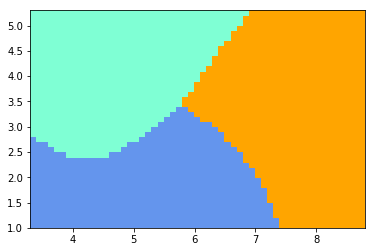

In [19]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['aquamarine', 'cornflowerblue', 'orange'])
cmap_bold = ListedColormap( ['turquoise','navy',  'darkorange'])

closest = c.reshape(xx.shape)
plt.pcolormesh(xx, yy, closest, cmap=cmap_light)

In [20]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(data, labels)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

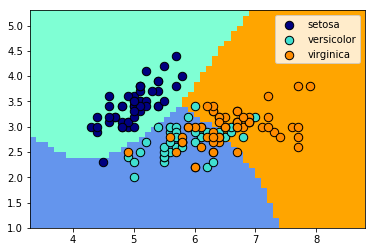

In [21]:
colors = ['navy', 'turquoise', 'darkorange']
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
for i, c, label in zip(target_ids, colors, iris.target_names):
    plt.scatter(data[i == labels, 0],data[i == labels, 1], c = c,  edgecolors='black', s=285,label=label, marker='.')
plt.legend()

plt.show()